# **House Price Prediction**

## **1. Problem Statement and Goa**l

**Objective**

I aim to predict house prices using property features such as size, number of bedrooms, and location. This will help buyers, sellers, and real estate agents make informed decisions.

### Approach

I will:

- Load the House Price dataset from Kaggle
- Preprocess features like square footage, bedrooms, and location
- Handle missing values and encode categorical features
- Train regression models:
  - Linear Regression
  - Gradient Boosting Regressor
- Evaluate models using:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
- Visualize predicted vs actual prices

## **2. Import Required Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Train-test split
from sklearn.model_selection import train_test_split

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error



# **3. Load Dataset**

Dataset: Heart Disease UCI Dataset (downloaded from Kaggle)

In [2]:
# Load dataset
df = pd.read_csv("Home_Prices.csv")

# Display first rows
df.head()


,Unnamed: 0,Rooms,Type,Method,Distance,Bathroom,Car,Landsize,BuildingArea,RegionName,PropertyCount,Price,Age
0,0,2,h,SS,2.5,1.0,1.0,126.0,NaN,Northern Metropolitan,4019,NaN,NaN
1,1,2,h,S,2.5,1.0,1.0,202.0,NaN,Northern Metropolitan,4019,1480000.0,NaN
2,2,2,h,S,2.5,1.0,0.0,156.0,79.0,Northern Metropolitan,4019,1035000.0,119.0
3,3,3,u,VB,2.5,2.0,1.0,0.0,NaN,Northern Metropolitan,4019,NaN,NaN
4,4,3,h,SP,2.5,2.0,0.0,134.0,150.0,Northern Metropolitan,4019,1465000.0,119.0


In [3]:
# Check column names
df.columns


Index(['Unnamed: 0', 'Rooms', 'Type', 'Method', 'Distance', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'RegionName', 'PropertyCount', 'Price',
       'Age'],
      dtype='object')

# **4. Dataset Overview and Exploration**

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17515 entries, 0 to 17514
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17515 non-null  int64  
 1   Rooms          17515 non-null  int64  
 2   Type           17515 non-null  object 
 3   Method         17515 non-null  object 
 4   Distance       17515 non-null  float64
 5   Bathroom       13719 non-null  float64
 6   Car            13719 non-null  float64
 7   Landsize       13696 non-null  float64
 8   BuildingArea   7381 non-null   float64
 9   RegionName     17515 non-null  object 
 10  PropertyCount  17515 non-null  int64  
 11  Price          13613 non-null  float64
 12  Age            8492 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 1.7+ MB


,Unnamed: 0,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,PropertyCount,Price,Age
count,17515.000000,17515.000000,17515.000000,13719.000000,13719.000000,13696.000000,7381.000000,17515.000000,1.361300e+04,8492.000000
mean,8757.000000,2.935541,9.401964,1.546104,1.567097,497.433557,149.233148,7481.364145,1.070293e+06,57.233278
std,5056.289318,0.983773,4.932455,0.719047,0.968598,1356.840626,144.763430,4404.645347,6.545745e+05,38.620209
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,389.000000,7.000000e+00,-87.000000
25%,4378.500000,2.000000,5.900000,1.000000,1.000000,158.000000,92.000000,4442.000000,6.400000e+05,21.000000
50%,8757.000000,3.000000,9.200000,1.000000,1.000000,385.000000,127.000000,6567.000000,8.900000e+05,53.000000
75%,13135.500000,4.000000,12.000000,2.000000,2.000000,644.000000,179.000000,10331.000000,1.320000e+06,89.000000
max,17514.000000,12.000000,47.400000,12.000000,26.000000,76000.000000,6791.000000,21650.000000,8.000000e+06,823.000000


## **5. Data Preprocessing**



In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Drop irrelevant columns
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Drop rows where target 'Price' is missing
df = df.dropna(subset=['Price'])

# Handle missing numeric values
numeric_features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize',
                    'BuildingArea', 'PropertyCount', 'Age']
imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Encode categorical features safely
categorical_features = ['Type', 'Method', 'RegionName']
categorical_features = [col for col in categorical_features if col in df.columns]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Output shapes for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10890, 25)
X_test shape: (2723, 25)
y_train shape: (10890,)
y_test shape: (2723,)


## **6. Train Regression Models**

In [9]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)


## **7. Model Evaluation**

In [10]:
# Linear Regression Evaluation
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(f"Linear Regression - MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}")

# Gradient Boosting Evaluation
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
print(f"Gradient Boosting - MAE: {gbr_mae:.2f}, RMSE: {gbr_rmse:.2f}")


Linear Regression - MAE: 276409.06, RMSE: 409767.45
Gradient Boosting - MAE: 205150.27, RMSE: 330725.62


## **8. Visualization: Actual vs Predicted Prices**

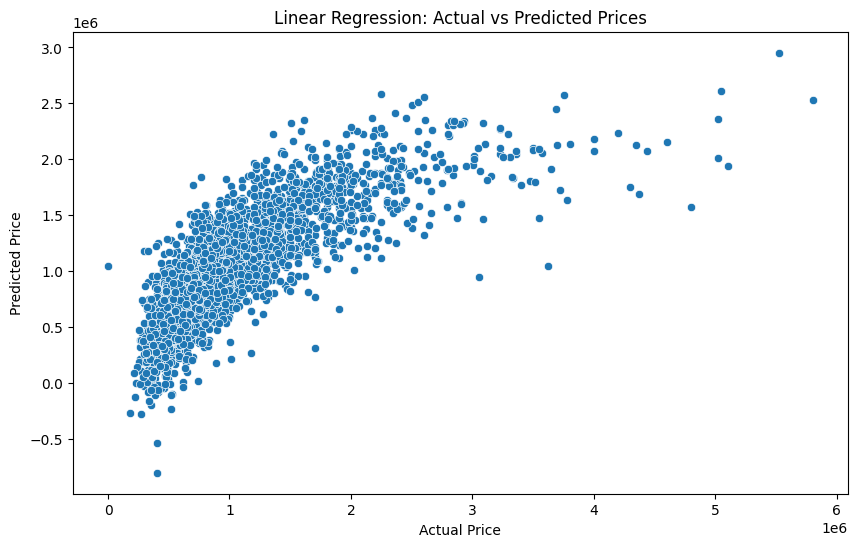

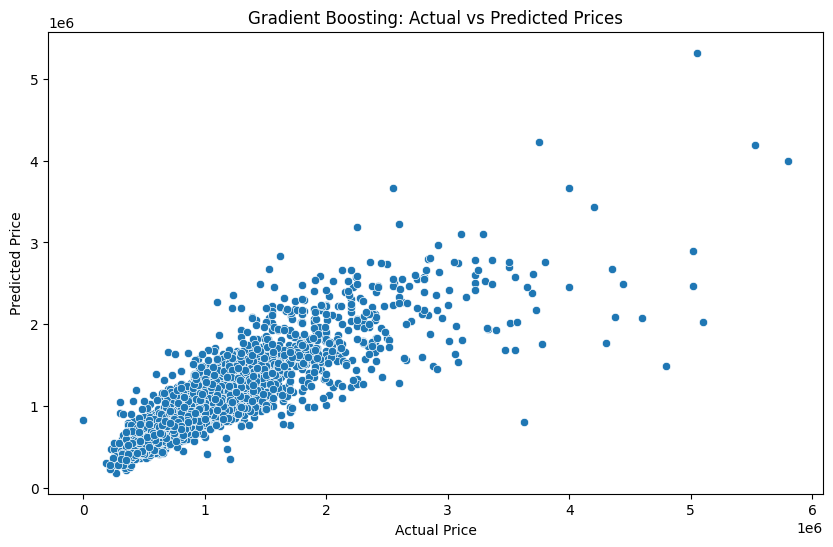

In [11]:
# Linear Regression
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

# Gradient Boosting
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=gbr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.show()


## **9. Feature Importance (Gradient Boosting)**

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,Rooms,0.281122
22,RegionName_Southern Metropolitan,0.213811
1,Distance,0.175409
9,Type_u,0.099356
5,BuildingArea,0.058796
4,Landsize,0.044801
2,Bathroom,0.041598
7,Age,0.028458
6,PropertyCount,0.014966
19,RegionName_Northern Metropolitan,0.012236


## **10. Results Discussion and Insights**

### Observations

- Gradient Boosting performed better than Linear Regression in capturing complex patterns.
- Features like Rooms, BuildingArea, Distance, and RegionName were most influential.
- Proper preprocessing (imputation, encoding, scaling) improved prediction accuracy.

### Key Insights

- Property size and location significantly influence prices.
- Linear Regression is suitable for simple linear trends.
- Gradient Boosting captures non-linear effects and interactions.

